In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import plotnine as gg
from plotnine import *
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from pathlib import 

# Principle Component Analysis

In [6]:
path = '/Users/habbasi/Desktop/050919_Nathianel_Gray/collated/'
file = os.path.join(path, 'C-7210-01-CMP-008-gray_collapsed_sampled.csv')

# Importing data 



df = pd.read_csv(file)


#Merging of dataframes (Platemap with compound information + old data)
# df = data2.merge(data1, on = ['Metadata_broad_sample'])
# filtered_A549 = (df.Metadata_Plate == 'BR00100032') | (df.Metadata_cell_line == 'A549')
# data = df[filtered_A549]
# data.head()

# data = pd.merge(data1, data2, on=['Metadata_broad_sample'], how='inner')
# data.head()

#Parsing Metadata columns
metadata_columns = df.columns.str.contains("Metadata")
df_metadata = df.loc[:, metadata_columns]

df_var = df.loc[:, ~metadata_columns].values
x = df_var
y = df.Metadata_compound_name.values
y_df = pd.DataFrame(df[['Metadata_compound_name', 'Metadata_cell_line', 'Metadata_Annotation']])


In [7]:
pca = PCA(n_components=2)
x_r = pca.fit(x).transform(x)
test = pd.DataFrame(x_r, columns= ['PC1', 'PC2'])

# # Setup plotting logic
combined = test.merge(y_df, left_index=True, right_index=True)
combined.head()



# var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
# var

,PC1,PC2,Metadata_compound_name,Metadata_cell_line,Metadata_Annotation
0,-12.441845,0.655285,DMSO,A549,control
1,-0.994625,-10.628107,DMSO,A549,control
2,-2.709400,-6.607544,DMSO,A549,control
3,-22.533556,-12.182000,DMSO,A549,control
4,-29.108185,-2.852287,DMSO,A549,control


/Users/habbasi/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/habbasi/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /Users/habbasi/Desktop/Gray_project_PCA.pdf
  warn('Filename: {}'.format(filename))


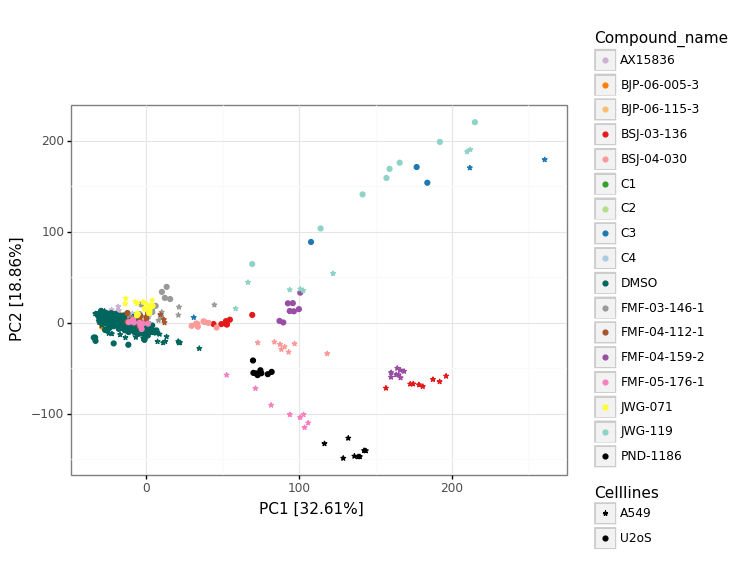

<ggplot: (-9223372029300259198)>

In [10]:
p = gg.ggplot(combined, gg.aes(x='PC1', y='PC2', color='Metadata_compound_name', label='Metadata_compound_name', shape='Metadata_cell_line')) + \
    gg.geom_point() + \
    gg.theme_bw() + \
    gg.xlab("PC1 [32.61%]") + \
    gg.ylab("PC2 [18.86%]") + \
    gg.scale_colour_manual(name= 'Compound_name', values=["#cab2d6", "#ff7f00", "#fdbf6f", "#e31a1c",
                                                         "#fb9a99", "#33a02c","#b2df8a", "#1f78b4",
                                                         "#a6cee3", "#01665e", "#999999", "#a65628",
                                                         "#984ea3", "#f781bf", "#ffff33", "#8dd3c7",
                                                         "#000000"]) + \
    gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])

    

ggsave(filename='Gray_project_PCA.pdf', plot = p, path = '/Users/habbasi/Desktop/')
    
p



In [152]:
# Clustering analysis for BR00100032 and A549
path = '/Users/habbasi/Desktop/2018_11_20_Batch1'
file = os.path.join(path, 'C-7210-01-CMP-008-gray_collapsed_new1.csv')
df = pd.read_csv(file)

filtered_A549 = (df.Metadata_Plate == 'BR00100032') 
data = df[filtered_A549]

# # # #Parsing Metadata columns
metadata_columns = data.columns.str.contains("Metadata")
df_metadata = data.loc[:, metadata_columns]
df_var = data.loc[:, ~metadata_columns].values
x = df_var
y = data.Metadata_compound_name.values
y_df = pd.DataFrame(df[['Metadata_Annotation','Metadata_compound_name']])


# # # ## PCA analysis
pca = PCA(n_components=2)
x_r = pca.fit(x).transform(x)

# # # var=(np.round(pca.explained_variance_ratio_, decimals=3)*100)
# # # var
test = pd.DataFrame(x_r, columns= ['PC1', 'PC2'])

# # # # # # # Setup plotting logic
combined = test.merge(y_df, left_index=True, right_index=True)
filtered = (combined. Metadata_compound_name== 'PND-1186').count() 
filtered

# # # #Plotting Figure

# # p = gg.ggplot(combined, gg.aes(x='PC1', y='PC2', color='Metadata_compound_name', label='Metadata_compound_name')) + \
# #     gg.geom_point() + \
# #     gg.theme_bw() + \
# #     gg.xlab("PC1 [42%]") + \
# #     gg.ylab("PC2 [21%]") + \
# #     gg.ggtitle("Principal component analysis")
# # ggsave(filename='Gray_project_PCA.pdf', plot = p, path = '/Users/habbasi/Desktop/')

# # p



384